# Data visualisation

esc and then M to creat mark down 

# 1.Import lib


In [81]:
import pandas as pd

In [82]:
import matplotlib.pyplot as plt

# 2. Grab data

In [83]:
data = pd.read_csv("DATA.csv") 



In [118]:
data.head()

data_a =data.loc[data['club']=='Arsenal']

# 3. exploring the data

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
name            461 non-null object
club            461 non-null object
age             461 non-null int64
position        461 non-null object
position_cat    461 non-null object
market_value    461 non-null float64
page_views      461 non-null int64
fpl_value       461 non-null float64
fpl_sel         461 non-null float64
fpl_points      461 non-null int64
region          460 non-null object
nationality     461 non-null object
new_foreign     461 non-null int64
age_cat         461 non-null int64
club_id         461 non-null int64
big_club        461 non-null int64
new_signing     461 non-null int64
dtypes: float64(3), int64(8), object(6)
memory usage: 61.3+ KB


check for missing data
check the data type 
look for numerical data that needs changing "astype"

# 4. Plotting a scatter plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


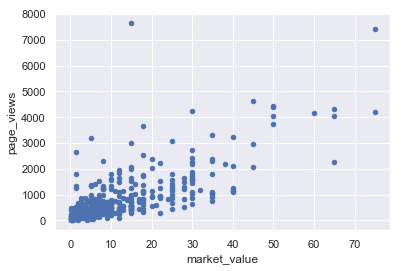

In [86]:
data.plot.scatter(x='market_value',y='page_views')

# 5. Scatter plot usigng matplotlibe.pyplot

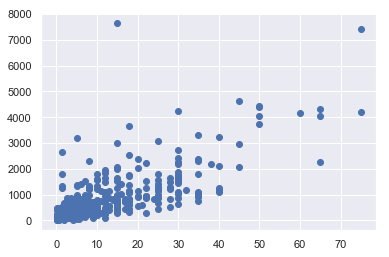

In [87]:
plt.scatter(data.market_value,data.page_views)

Text(0.5, 1.0, 'Points')

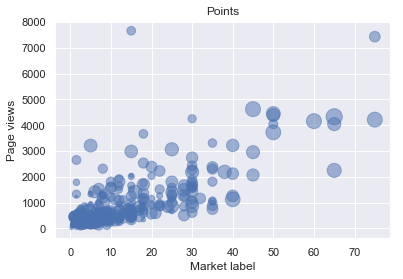

In [88]:
plt.scatter(data.market_value,
            data.page_views,
            s=data.fpl_points,
            alpha=0.5)
plt.xlabel('Market label')
plt.ylabel('Page views')
plt.title('Points')
           

# 6. Import a new lib

In [89]:
import seaborn as sns

In [90]:
sns.set()

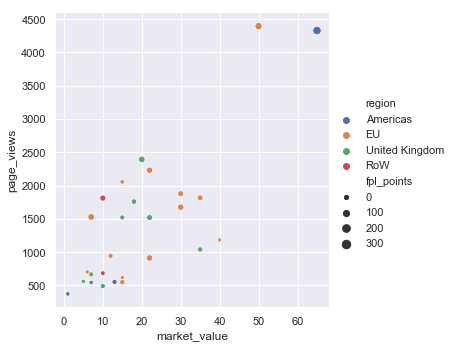

In [119]:
sns.relplot(x='market_value',y='page_views',hue='region',  size='fpl_points' ,data=data_a)

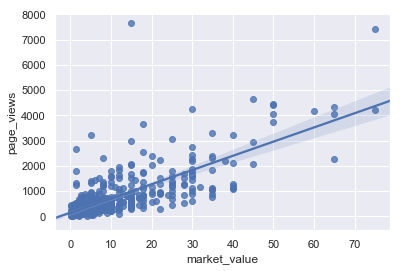

In [92]:
sns.regplot(x='market_value', y ='page_views',data=data)

In [93]:
data.corr()

,age,market_value,page_views,fpl_value,fpl_sel,fpl_points,new_foreign,age_cat,club_id,big_club,new_signing
age,1.000000,-0.132396,-0.048682,-0.097659,-0.003018,0.187785,-0.125400,0.972199,-0.002868,-0.123566,-0.079190
market_value,-0.132396,1.000000,0.739657,0.788653,0.548703,0.615155,0.098056,-0.117682,-0.046068,0.593483,0.131321
page_views,-0.048682,0.739657,1.000000,0.730640,0.524926,0.542464,-0.049725,-0.041672,-0.092409,0.502982,0.127249
fpl_value,-0.097659,0.788653,0.730640,1.000000,0.504888,0.618837,0.108650,-0.082056,-0.060884,0.423556,0.098314
fpl_sel,-0.003018,0.548703,0.524926,0.504888,1.000000,0.517008,0.079416,-0.010506,-0.033063,0.269498,-0.026993
fpl_points,0.187785,0.615155,0.542464,0.618837,0.517008,1.000000,-0.204837,0.176572,0.041094,0.280061,0.085720
new_foreign,-0.125400,0.098056,-0.049725,0.108650,0.079416,-0.204837,1.000000,-0.113998,-0.002786,0.080949,-0.078193
age_cat,0.972199,-0.117682,-0.041672,-0.082056,-0.010506,0.176572,-0.113998,1.000000,-0.004668,-0.113835,-0.076102
club_id,-0.002868,-0.046068,-0.092409,-0.060884,-0.033063,0.041094,-0.002786,-0.004668,1.000000,-0.155667,0.134085
big_club,-0.123566,0.593483,0.502982,0.423556,0.269498,0.280061,0.080949,-0.113835,-0.155667,1.000000,0.035508


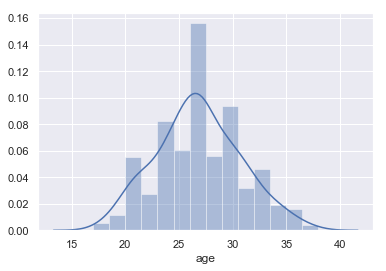

In [94]:
sns.distplot(data.age)

# 7. import function from another lib

In [95]:
# get the bokeh function to plot a figure and to read data that has been arranged by coloumns 
from bokeh.plotting import figure, ColumnDataSource
# get bokeh fucntion for outputs that we want
from bokeh.io import output_file,show, output_notebook
#get bokeh function where we want to use a hover tool, to get information of the point 
from bokeh.models import HoverTool

#Display all Bokeh figures inline 

output_notebook()

Loading BokehJS ...

load the datafram data to be used within the bookeh library

In [96]:
source = ColumnDataSource(data)

Create a bokeh figure with the hoovertool that is empty for now 

In [97]:
p=figure(tools=['hover'])

Creat the figure p display the data points as dots

In [113]:
p.circle('market_value','page_views',source=source)
#Specify the hoover tool
hover=HoverTool(tooltips=[('Name','@name'),('Team','@club')])

In [111]:
p.add_tools(hover)

p.outline_line_width = 7
p.outline_line_alpha = 0.3
p.outline_line_color = "navy"
p.xaxis.axis_label = "Price"
p.yaxis.axis_label = "VIEWS"
p.axis.major_label_text_color = "blue"

show(p)